In [1]:
#Call Packages
import pandas as mypd
import numpy as mynp
import matplotlib.pyplot as myplot
import seaborn as mysea
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject


In [42]:
#import data file
mydata=mypd.read_csv("C:/Users/demo/Desktop/Regression analysis/housing.csv")

In [43]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       60 non-null     float64
 1   LSTAT    60 non-null     float64
 2   PTRATIO  60 non-null     float64
 3   MEDV     60 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 1.9 KB


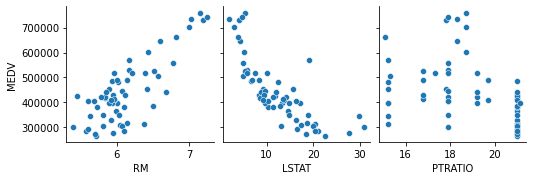

In [44]:
mysea.pairplot(mydata,x_vars=['RM','LSTAT','PTRATIO'],y_vars=['MEDV'])

<AxesSubplot:>

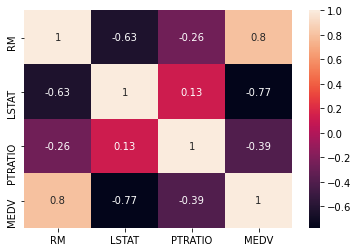

In [45]:
#Plot Coeeficent of Correlation
mysea.heatmap(mydata.corr(),annot=True)

In [55]:
#Make a regression model between MEDV and LSTAT
#Split the data in training and testing
train_data,test_data=train_test_split(mydata,test_size=0.2,random_state=42)
y=train_data.MEDV.to_numpy().reshape(-1,1)
x=train_data.LSTAT.to_numpy().reshape(-1,1)
import operator
sort_axis=operator.itemgetter(0)
sorted_zip=sorted(zip(x,y),key=sort_axis)
x,y=zip(*sorted_zip)
y_test=test_data.MEDV.to_numpy().reshape(-1,1)
x_test=test_data.LSTAT.to_numpy().reshape(-1,1)
sorted_zip=sorted(zip(x_test,y_test),key=sort_axis)
x_test,y_test=zip(*sorted_zip)
def create_poly(deg):
    poly_reg=PolynomialFeatures(degree=deg)
    x_poly=poly_reg.fit_transform(x)
    lin_reg=LinearRegression()
    lin_reg.fit(x_poly,y)
    pred_y=lin_reg.predict(x_poly)
    myplot.plot(x,pred_y,color='blue')
    rmse=mynp.sqrt(mse(y,pred_y))
    rtwo=r2(y,pred_y)
    print("Degree=",deg)
    print("Traing RMSE=",rmse)
    print("Trainig R2-Square=",rtwo)
    x_poly_t=poly_reg.fit_transform(x_test)
    pred_y_t=lin_reg.predict(x_poly_t)
    rmse_t=mynp.sqrt(mse(y_test,pred_y_t))
    rtwo_t=r2(y_test,pred_y_t)
    print("TESTING RMSE=",rmse_t)
    print("TESTING R2-Square=",rtwo_t)

Degree= 1
Traing RMSE= 82293.08771697414
Trainig R2-Square= 0.6036897603236027
TESTING RMSE= 70066.42483155927
TESTING R2-Square= 0.5524090586947824
Degree= 2
Traing RMSE= 65313.39605198682
Trainig R2-Square= 0.7503606115078167
TESTING RMSE= 58524.2523476166
TESTING R2-Square= 0.6877279452961294
Degree= 4
Traing RMSE= 61432.19966993472
Trainig R2-Square= 0.779148318445272
TESTING RMSE= 50232.030543802175
TESTING R2-Square= 0.7699496805854996
Degree= 6
Traing RMSE= 59221.15605400457
Trainig R2-Square= 0.7947598421617303
TESTING RMSE= 55080.19316476535
TESTING R2-Square= 0.7233999325721359
Degree= 15
Traing RMSE= 78795.40013670287
Trainig R2-Square= 0.636662428930078
TESTING RMSE= 10308963.810386414
TESTING R2-Square= -9688.277682614098
Degree= 20
Traing RMSE= 96505.91060397522
Trainig R2-Square= 0.45497502463861794
TESTING RMSE= 181274077.58010378
TESTING R2-Square= -2995936.714269986


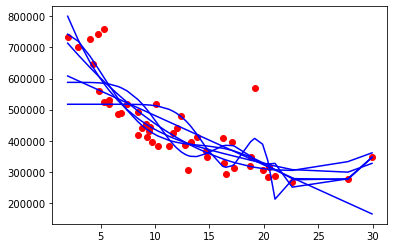

In [57]:
deg={1,2,4,6,15,20}
for i in deg:
    create_poly(i)
myplot.scatter(x,y,color='red')
myplot.show()